### Questions to answer:
1. Looking at the data, which customers would you deem risky in terms of Money
Laundering based on their behaviour?
2. What kind of info would you like to acquire from/about these customers in order to
trust our service to them or deny it? How would you go about getting this info?

In [1]:
import pickle
filename = "ds.pkl"
ds = pickle.load(open(filename, 'rb'))

# Sort the Transfers by there Anomalous Behavior

In [2]:
ds.sort_values(['anomalous_score'])[['user_id', 'addr_country_code', 'addr_city', 'anomalous']].head(10)

,user_id,addr_country_code,addr_city,anomalous
57362,69fd02c4fbd5bfa6533f7a5eac3bd81c,FIN,HELSINKI,1
48695,69fd02c4fbd5bfa6533f7a5eac3bd81c,FIN,HELSINKI,1
5779,69fd02c4fbd5bfa6533f7a5eac3bd81c,FIN,HELSINKI,1
35815,69fd02c4fbd5bfa6533f7a5eac3bd81c,FIN,HELSINKI,1
47108,69fd02c4fbd5bfa6533f7a5eac3bd81c,FIN,HELSINKI,1
14917,69fd02c4fbd5bfa6533f7a5eac3bd81c,FIN,HELSINKI,1
15194,69fd02c4fbd5bfa6533f7a5eac3bd81c,FIN,HELSINKI,1
10023,69fd02c4fbd5bfa6533f7a5eac3bd81c,FIN,HELSINKI,1
34178,69fd02c4fbd5bfa6533f7a5eac3bd81c,FIN,HELSINKI,1
44262,69fd02c4fbd5bfa6533f7a5eac3bd81c,FIN,HELSINKI,1


In [6]:
import pandas as pd

In [7]:
pd.unique(ds.sort_values(['anomalous_score']).user_id)

array(['69fd02c4fbd5bfa6533f7a5eac3bd81c',
       '77bcb7b0e9b089c275ab709ab3113772',
       'ae20e80e0ee9b59eeecead60fc10a441', ...,
       '1b6add66bc9e57f9a683ab81a5d77eb1',
       '18e5875499d16c369ff581ac5aad3f0d',
       '707bcdda808d7525f0a70fa2da4d4a92'], dtype=object)

In [ ]:
ds.sort_values(['anomalous_score'])[['user_id', 'addr_country_code', 'addr_city', 'anomalous']]

## Reporting the Missing features for those Customers

In [3]:
import pandas as pd 

In [4]:
print('index', 'Number of Missing')
ds.sort_values(['anomalous_score']).isnull().sum(axis=1).head(10)

index Number of Missing


57362    2
48695    2
5779     2
35815    2
47108    2
14917    2
15194    2
10023    2
34178    2
44262    2
dtype: int64

In [5]:
for ix in ds.sort_values(['anomalous_score']).isnull().sum(axis=1).head(10).index:
    display(ds.iloc[ix][['user_id', 'addr_country_code', 'addr_city']])
    print('missing values:')
    print(list(ds.iloc[ix].isnull()[ds.iloc[ix].isnull()].index))
    print('------------------------------------------------------------------------------------')

user_id              69fd02c4fbd5bfa6533f7a5eac3bd81c
addr_country_code                                 FIN
addr_city                                    HELSINKI
Name: 57362, dtype: object

missing values:
['date_request_cancelled', 'invoice_value_cancel']
------------------------------------------------------------------------------------


user_id              69fd02c4fbd5bfa6533f7a5eac3bd81c
addr_country_code                                 FIN
addr_city                                    HELSINKI
Name: 48695, dtype: object

missing values:
['date_request_cancelled', 'invoice_value_cancel']
------------------------------------------------------------------------------------


user_id              69fd02c4fbd5bfa6533f7a5eac3bd81c
addr_country_code                                 FIN
addr_city                                    HELSINKI
Name: 5779, dtype: object

missing values:
['date_request_cancelled', 'invoice_value_cancel']
------------------------------------------------------------------------------------


user_id              69fd02c4fbd5bfa6533f7a5eac3bd81c
addr_country_code                                 FIN
addr_city                                    HELSINKI
Name: 35815, dtype: object

missing values:
['date_request_cancelled', 'invoice_value_cancel']
------------------------------------------------------------------------------------


user_id              69fd02c4fbd5bfa6533f7a5eac3bd81c
addr_country_code                                 FIN
addr_city                                    HELSINKI
Name: 47108, dtype: object

missing values:
['date_request_cancelled', 'invoice_value_cancel']
------------------------------------------------------------------------------------


user_id              69fd02c4fbd5bfa6533f7a5eac3bd81c
addr_country_code                                 FIN
addr_city                                    HELSINKI
Name: 14917, dtype: object

missing values:
['date_request_cancelled', 'invoice_value_cancel']
------------------------------------------------------------------------------------


user_id              69fd02c4fbd5bfa6533f7a5eac3bd81c
addr_country_code                                 FIN
addr_city                                    HELSINKI
Name: 15194, dtype: object

missing values:
['date_request_cancelled', 'invoice_value_cancel']
------------------------------------------------------------------------------------


user_id              69fd02c4fbd5bfa6533f7a5eac3bd81c
addr_country_code                                 FIN
addr_city                                    HELSINKI
Name: 10023, dtype: object

missing values:
['date_request_cancelled', 'invoice_value_cancel']
------------------------------------------------------------------------------------


user_id              69fd02c4fbd5bfa6533f7a5eac3bd81c
addr_country_code                                 FIN
addr_city                                    HELSINKI
Name: 34178, dtype: object

missing values:
['date_request_cancelled', 'invoice_value_cancel']
------------------------------------------------------------------------------------


user_id              69fd02c4fbd5bfa6533f7a5eac3bd81c
addr_country_code                                 FIN
addr_city                                    HELSINKI
Name: 44262, dtype: object

missing values:
['date_request_cancelled', 'invoice_value_cancel']
------------------------------------------------------------------------------------


# Visualize the Dataset

In [6]:
identifiers = ['user_id', 'request_id', 'target_recipient_id']
date_cols = ['date_user_created', 'date_request_submitted', 'date_request_received','date_request_transferred', \
             'first_attempt_date', 'first_success_date']
categorical = ['addr_country_code', 'addr_city', 'recipient_country_code', 'flag_personal_business', 'payment_type', \
               'payment_status', 'ccy_send', 'ccy_target', 'transfer_to_self', 'sending_bank_name',  'sending_bank_country',\
               'payment_reference_classification', 'device']

In [7]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import IsolationForest
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import TruncatedSVD

from tempfile import mkdtemp
from shutil import rmtree
from sklearn.externals.joblib import Memory

class dateEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        print('Processing DateTime Data')
        print('Encoding....')
        retX = pd.DataFrame()
        #print(X)
        for colname, col in X.iteritems():
            retX[colname+'_dayofweek'] = col.dt.dayofweek
            retX[colname+'_weekday'] = col.dt.weekday
            retX[colname+'_hour'] = col.dt.hour
            retX[colname+'_minute'] = col.dt.minute
            retX[colname+'_day'] = col.dt.day
            retX[colname+'_month'] = col.dt.month
            #retX[colname+'_year'] = col.dt.year
    
        return retX
    
def prepare_pipeline(ds):
    
    numeric_features = ds.select_dtypes(include=[np.float or np.float]).columns.tolist()
    categorical_features = ds.select_dtypes(include=['object']).columns.tolist()
    date_features = ds.select_dtypes(include=[np.datetime64]).columns.tolist()
    
    cachedir = mkdtemp()
    memory = Memory(cachedir=cachedir, verbose=1)

    date_transformer = Pipeline(memory=memory, steps=[('dateEncoder', dateEncoder()), ('imputer', SimpleImputer(strategy='median', verbose=1))])
    numeric_transformer = Pipeline(memory=memory, steps=[('imputer', SimpleImputer(strategy='median', verbose=1))])
    categorical_transformer = Pipeline(memory=memory, steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing', verbose=1)),
                                                             ('onehot', OneHotEncoder(handle_unknown='ignore'))])    

    preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),
                                                   ('dates', date_transformer, date_features),
                                                   ('cat', categorical_transformer, categorical_features)])

    proc = Pipeline(steps=[('preprocessor', preprocessor),
                                       ('svd', TruncatedSVD(n_components=10, n_iter=10, random_state=42))])
    
    return proc

In [8]:
preprocessor = prepare_pipeline(ds[[c for c in ds.columns.tolist() if c not in identifiers]])

C:\ProgramData\Anaconda34\envs\gpu_env\lib\site-packages\ipykernel_launcher.py:41: DeprecationWarning: The 'cachedir' parameter has been deprecated in version 0.12 and will be removed in version 0.14.
You provided "cachedir='C:\\Users\\KHALID~1\\AppData\\Local\\Temp\\tmpmcwaumm8'", use "location='C:\\Users\\KHALID~1\\AppData\\Local\\Temp\\tmpmcwaumm8'" instead.


In [9]:
from FIt_SNE.fast_tsne import fast_tsne

In [10]:
ds_ = ds[[c for c in ds.columns.tolist() if c not in identifiers]]
px = fast_tsne(preprocessor.fit(ds_).transform(ds_), 
                         learning_rate=1000, max_iter=5000,
                         n_trees=500, perplexity=100,
                         df=0.5,
                         early_exag_coeff=15,  
                         late_exag_coeff=5)

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(dateEncoder(),         date_user_created date_request_submitted date_request_received  \
0     2014-01-27 15:02:00    2016-08-26 07:35:00   2016-01-09 08:31:00   
1     2015-12-10 15:35:00    2016-10-23 22:54:00                   NaT   
2     2016-04-10 11:42:00    2016-10-26 13:42:00   2016-10-26 14:06:00   
3     2014-10-17 00:27:00    2015-01-28 23:36:00   2015-01-28 23:36:00   
4     2015-12-08 07:45:00    2015-08-18 08:55:00   2015-08-18 09:12:00   
5     2016-04-19 16:30:00    2016-02-10 11:59:00   2016-02-10 12:00:00   
6     2015-10-15 19:48:00    2016-12-08 20:54:00   2016-12-08 20:54:00   
7     2015-12-03 21:04:00    2015-05-31 09:49:00   2015-05-31 09:52:00   
8     2015-04-30 16:05:00    2015-..., 
None, None)
Processing DateTime Data
Encoding....
________________________________________________fit_transform_one - 0.2s,

C:\ProgramData\Anaconda34\envs\gpu_env\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 3.05s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 3.0s, 0.1min
Processing DateTime Data
Encoding....


In [11]:
import matplotlib.pyplot as plt

In [12]:
y = ds['anomalous'].values

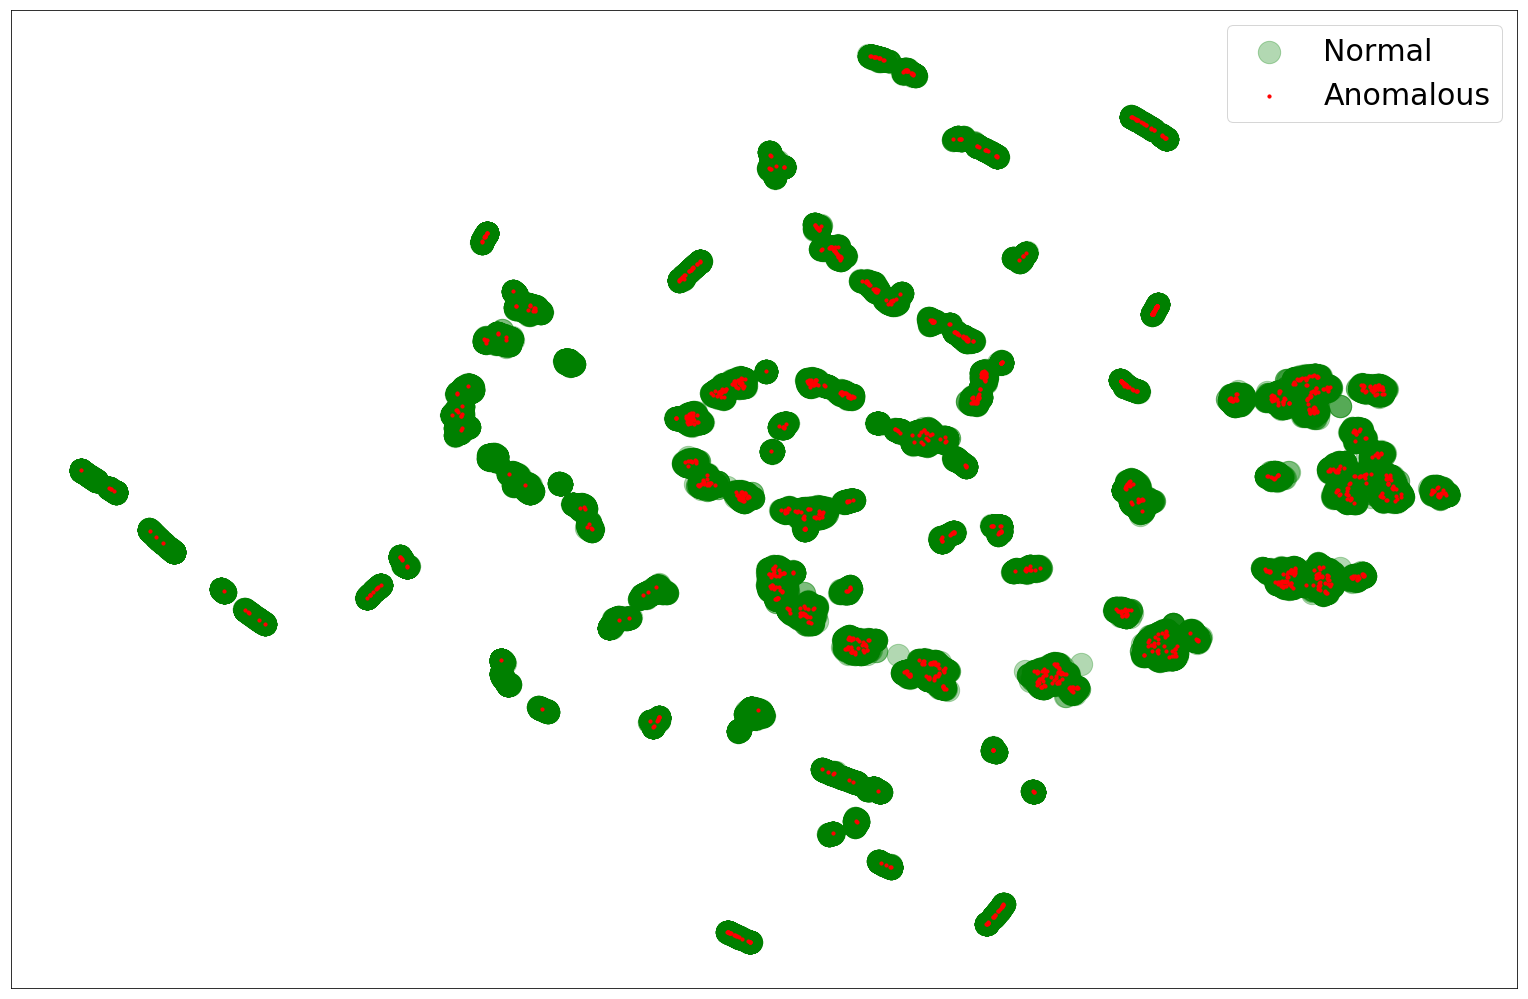

In [16]:
plt.figure(figsize=(27,18))
plt.scatter(px[:, 0][y==0], px[:, 1][y==0], s=500, c='green', alpha=0.3)
plt.scatter(px[:, 0][y==1], px[:, 1][y==1], s=10, c='red')
plt.xticks([]), plt.yticks([])
plt.legend(['Normal', 'Anomalous'], prop={'size': 30})

In [14]:
import pickle
filename = "px.pkl"
pickle.dump(px, open(filename, 'wb'))